# Lab Assignment One: Exploring Table Data

By: Maria Heredia, Manov Jain, Troy McNitt

## 1. Business Understanding

*In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties? (Be specific and use your own words to describe the aspects of the data)*

For this assignment, we have chosen to look at the adult census dataset from UCI. The raw data was collected during the 1994 US Census and later formatted by Barry Becker in 1996. The dataset includes 14 attributes and looks to predict if an individual makes over $50,000 in income a year. 

Adjusted for [inflation](https://www.in2013dollars.com/us/inflation/1994?amount=50000), this equals a 2021 income of $92,106. That level of income would put an individual in the 82nd percentile of US [incomes](https://dqydj.com/income_percentile_calculator/).
 
This information is critical for policymakers and the general public to identify features that may equate to a better chance of earning a higher income. If any factor has a large impact on earnings, it is critical the public understand it as soon as possible in their life. It is equally important that governments at all levels understand what different factors play into the success of citizens, so they can attempt to bolster that behavior. The inverse is also important, as it informs possible biases that exist in society that may discriminate against certain members of society. 

## 2. Data Understanding

### 2.1 Data Description

Load the dataset and appropriately define data types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data is given without column names
columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'above_50K_income'
]

df = pd.read_csv('adultdata.csv', names=columns, index_col=False, sep=', ', engine='python')

# Convert str 50K income to boolean
df['above_50K_income'] = df['above_50K_income'] == '>50K'

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,above_50K_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


As seen above, we can see a preview of the dataset. This shows all of the 15 attributes of the first 5 rows.

Next, we will be looking at the type of data provided in the set.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num     32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  above_50K_income  32561 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 3.5+ MB


Based on the data frame above, it can be seen that all 15 attributes have the same number of entries (32561). This verifies that there is no missing data from the set.

To take a closer look at the data, we will create a table to see all the attributes with their corresponding description, scale, type of variable, and range. 

In [3]:
# create a data description table
data_des = pd.DataFrame()
data_des['Features'] = df.columns
data_des['Description'] = ['age', 
                           'work class identification',
                           'final weight', 
                           'education level',
                           'education ranking', 
                           'martial status identification',
                           'type of occupation', 
                           'type of relationship',
                           'race identification',
                           'sex identification',
                           'individual capital gain',
                           'individual capital lose',
                           'amount of hours working per week',
                           'individual native country',
                           'do they have above 50k income'
                          ]
data_des['Scales'] = ['ratio', 
                       'nominal',
                       'ratio', 
                       'ordinal',
                       'ordinal', 
                       'nominal',
                       'nominal', 
                       'nominal',
                       'nominal',
                       'nominal',
                       'ratio',
                       'ratio',
                       'ratio',
                       'nominal',
                       'nominal'
                        ]
data_des['Discrete\Continuous'] = ['continuous', 
                                   'discrete',
                                   'continuous', 
                                   'discrete',
                                   'discrete', 
                                   'discrete',
                                   'discrete', 
                                   'discrete',
                                   'discrete',
                                   'discrete',
                                   'continuous',
                                   'continuous',
                                   'continuous',
                                   'discrete',
                                   'discrete'
                                   ]
data_des['Range'] = ['17-19', 
                    'Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked',
                    '12,285 - 148,4705', 
                    'Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.',
                    '1-16', 
                    'Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse',
                    'Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces', 
                    'Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried',
                    'White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black',
                    'Female, Male',
                    '0-99999',
                    '0-4356',
                    '1-99',
                    'United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands',
                    'True, False'
                    ]

data_des

,Features,Description,Scales,Discrete\Continuous,Range
0,age,age,ratio,continuous,17-19
1,workclass,work class identification,nominal,discrete,"Private, Self-emp-not-inc, Self-emp-inc, Feder..."
2,fnlwgt,final weight,ratio,continuous,"12,285 - 148,4705"
3,education,education level,ordinal,discrete,"Bachelors, Some-college, 11th, HS-grad, Prof-s..."
4,education_num,education ranking,ordinal,discrete,1-16
5,marital_status,martial status identification,nominal,discrete,"Married-civ-spouse, Divorced, Never-married, S..."
6,occupation,type of occupation,nominal,discrete,"Tech-support, Craft-repair, Other-service, Sal..."
7,relationship,type of relationship,nominal,discrete,"Wife, Own-child, Husband, Not-in-family, Other..."
8,race,race identification,nominal,discrete,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,..."
9,sex,sex identification,nominal,discrete,"Female, Male"


By looking at the descriptive table and data frame above, it appears that each attribute has a reasonable data type. Hence, there is no need to manipulate or change the data types of any of the attributes.

Now, let's take a closer look at the continuous attributes through a descriptive table.

In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In the table above, there are a couple attributes that are interesting to note:

Age:
- To start of with the age attribute, the minimum is 17 and the maximum is 90. This makes sense since the curators of data only queried the census data for all data for the ages between 17 and 90. The rational is that this range represents the working population in the US.  
     
Final Weight (fnlwgt):
- Final weight is calculated by the dataset curators as an overall mechanism to compare two entries. The value is sourced from state-wide demographic information to represent how common an entry is in the overall population. Similar values within the same state demonstrates that two features of the two rows are similarly common in the population. 

Education Ranking (education_num):
- Next, the 'education_num' attribute is on an ordinal scale. This attribute is ranking individuals from 1-16 with 1 refering to the lowest education level and 16 refering to the highest level of education. After looking at the raw dataset, the rankings are in the following order: 
    * 1: Preschool
    * 2: 1st-4th 
    * 3: 5th-6th 
    * 4: 7th-8th 
    * 5: 9th
    * 6: 10th
    * 7: 11th 
    * 9: HS-grad
    * 10: Some-college
    * 11: Assoc-voc
    * 12: Assoc-acdm
    * 13: Bachelors
    * 14: Masters
    * 15: Prof-school
    * 16: Doctorate

Capital Gain:
- When looking at the maximum for this attribute, it is a capital gain of \\$99,999. This appears to be a cut-off level in the dataset. This means that there is a possibility of individuals having a capital gain of more than \\$99,999, thus making the data less accurate.

Hours per Week:
- Simiarly, when looking at the maximum for this attribute, it is working 99 hours a week. This also appears to be a cut-off level in the dataset. There could be a possiblitity of individuals working more than 99 hours which is realistic in modern society. However, because this census was taken in 1994, there is no way to verify that individuals were working more than 99 hours a week. Morever, these values can make the dataset less accurate.

**1. What data type should be used to represent each data attribute?**
(think this is already answered but I think we should either delete or change the data type of the 'education_num' attribute)

**2. Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.**
(kind of already answered, do we need more detail?)

### 2.2 Data Quality

Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  

In [5]:
# We can locate missing values
for column in df.columns:
    empty = df.loc[df[column] == '?']
    if empty.shape[0] > 0:
        print('Column {} missing {} values'.format(column, empty.shape[0]))

to_remove = (df['workclass'] == '?') |( df['occupation'] == '?') | (df['native_country'] == '?')

print('Removing {} rows from {} total, representing {:.2f}%'.format(to_remove.sum(), df.shape[0], (to_remove.sum()/df.shape[0])*100.0))

# Leaves us with over 30,000 datapoints, so we will remove them
df = df[~to_remove]

Column workclass missing 1836 values
Column occupation missing 1843 values
Column native_country missing 583 values
Removing 2399 rows from 32561 total, representing 7.37%


## 3. Data Visualization

### 3.1 Visualize Basic Feature Distributions

That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.

Plot 1: 

Text(0.5, 0, 'Age')

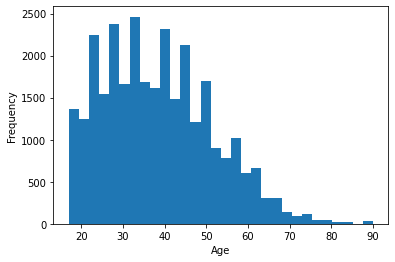

In [6]:
df.age.plot(kind='hist', bins=30)
plt.xlabel('Age')

Plot 2:

<AxesSubplot:ylabel='occupation'>

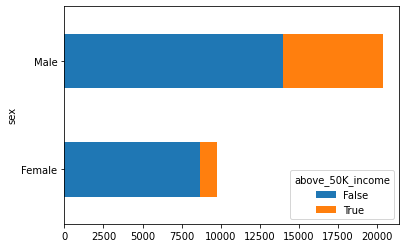

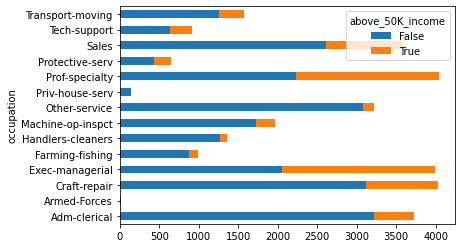

In [7]:
pd.crosstab(df['sex'], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
pd.crosstab(df['occupation'], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)

Plot 3:

<AxesSubplot:>

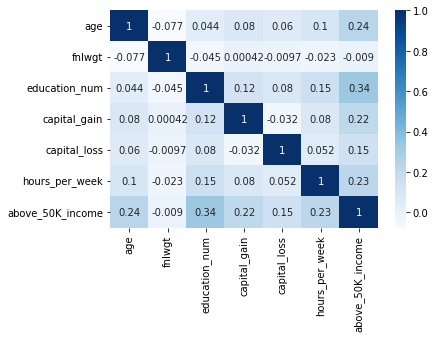

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

#Interesting to note that fnlwgt has almost no correlation on every feature... Which is how its supposed to be

Plot 4:

Plot 5:

### 3.2 Interpret Questions with Visualizations

Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  Important: Interpret the implications for each visualization.

Question 1:

<AxesSubplot:ylabel='race,sex'>

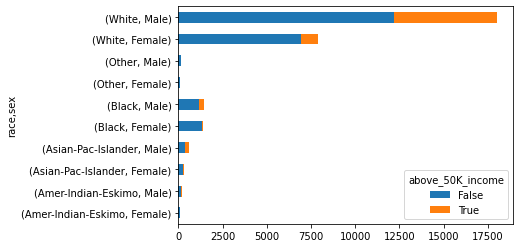

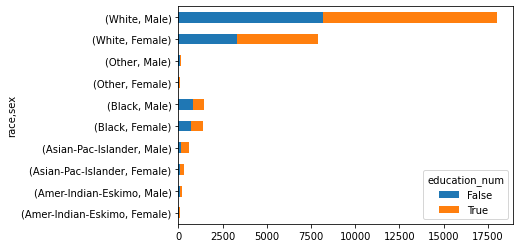

In [9]:
pd.crosstab([df['race'], df['sex']], df['above_50K_income'].astype(bool)).plot(kind='barh', stacked=True)
pd.crosstab([df['race'], df['sex']], (df['education_num'] > 9).astype(bool)).plot(kind='barh', stacked=True)

Question 2:

Question 3: 

## 4. Exceptional Work

- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods. You may be interested in the following information:
    * https://github.com/lmcinnes/umap (Links to an external site.) 
    * https://pair-code.github.io/understanding-umap/

For our example work, we look to explore a classifier based on some of the questions we asked above. We first encoding some of the string labels into a one hot encoding mapping uisng sklearn. From there we split the dataset into train/test. We use the train data to fit a random forest and support vector machine and compare their results. The overall accuracy is around 80% and at first seems like a good reuslt. However after looking at the confusion matrix, it can be seen the random forest is good at predicting true negative, but falters on true positives, barely beating 50%. This is partly caused by the dataset being so skewed with negative values. To further explore this, we look at a two component PCA reduction of the integer fields, and plot the results. This chart shows there is very little correlation between the features and the classification, which shows why the classifiers struggle.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

X = df[['age', 'sex', 'race', 'education_num', 'hours_per_week', 'occupation', 'marital_status', 'workclass']]
y = df['above_50K_income']

enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

Training accuracy: 0.9723493137059877
              precision    recall  f1-score   support

       False       0.86      0.91      0.88     11287
        True       0.66      0.55      0.60      3794

    accuracy                           0.82     15081
   macro avg       0.76      0.73      0.74     15081
weighted avg       0.81      0.82      0.81     15081



<AxesSubplot:>

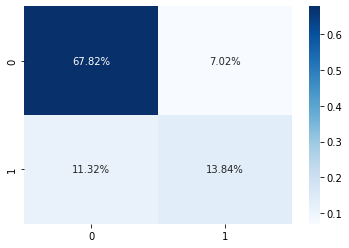

In [11]:
clf = make_pipeline(RandomForestClassifier())
rf_model = clf.fit(x_train, y_train)

print('Training accuracy:', rf_model.score(x_train, y_train))

predicted = pd.DataFrame(rf_model.predict(x_test))

print(metrics.classification_report(y_test, predicted))

cf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

Training accuracy: 0.8273987136131556
              precision    recall  f1-score   support

       False       0.85      0.93      0.89     11287
        True       0.72      0.51      0.59      3794

    accuracy                           0.83     15081
   macro avg       0.78      0.72      0.74     15081
weighted avg       0.82      0.83      0.82     15081



<AxesSubplot:>

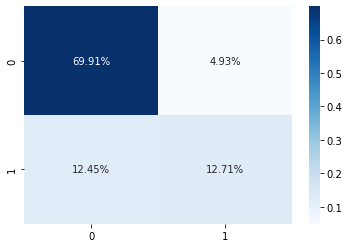

In [12]:
from sklearn.svm import SVC

clf = make_pipeline(SVC(gamma='auto'))

model = clf.fit(x_train, y_train)
print('Training accuracy:', model.score(x_train, y_train))

predicted = pd.DataFrame(model.predict(x_test))

print(metrics.classification_report(y_test, predicted))

cf_matrix = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [13]:
from sklearn.decomposition import PCA

X = df[['age', 'hours_per_week', 'education_num']]

pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)

Text(0, 0.5, '-0.41*age +0.91*hours_per_week +0.03*education_num ')

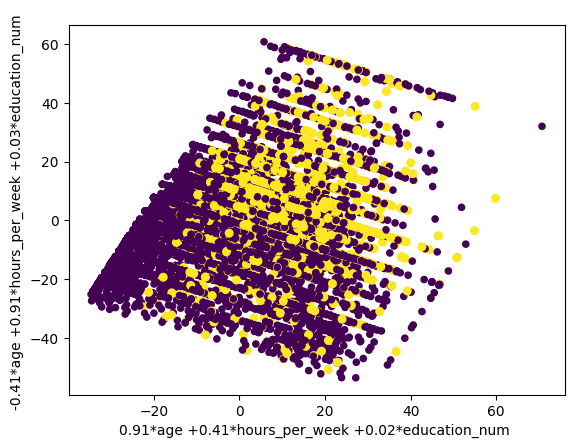

In [14]:
import seaborn as sns
cmap = sns.set(style="darkgrid") 

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f)
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, X.columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])